In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ExoplanetHabitabilityData.csv")
df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,5/14/2014,2008-01,5/14/2014
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,7/23/2014,2011-08,7/23/2014
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,9/19/2023,2023-08,9/19/2023
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,9/4/2018,2017-03,9/6/2018
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,4/25/2018,2009-10,5/14/2014


In [3]:
df.shape

(38095, 92)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38095 entries, 0 to 38094
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          38095 non-null  object 
 1   hostname         38095 non-null  object 
 2   default_flag     38095 non-null  int64  
 3   sy_snum          38095 non-null  int64  
 4   sy_pnum          38095 non-null  int64  
 5   discoverymethod  38095 non-null  object 
 6   disc_year        38095 non-null  int64  
 7   disc_facility    38095 non-null  object 
 8   soltype          38095 non-null  object 
 9   pl_controv_flag  38095 non-null  int64  
 10  pl_refname       38095 non-null  object 
 11  pl_orbper        34909 non-null  float64
 12  pl_orbpererr1    33367 non-null  float64
 13  pl_orbpererr2    33366 non-null  float64
 14  pl_orbperlim     34909 non-null  float64
 15  pl_orbsmax       21539 non-null  float64
 16  pl_orbsmaxerr1   7078 non-null   float64
 17  pl_orbsmaxer

In [5]:
(df.isnull().sum()/len(df)) * 100

pl_name           0.000000
hostname          0.000000
default_flag      0.000000
sy_snum           0.000000
sy_pnum           0.000000
                    ...   
sy_gaiamagerr1    2.703767
sy_gaiamagerr2    2.703767
rowupdate         0.002625
pl_pubdate        0.000000
releasedate       0.000000
Length: 92, dtype: float64

In [6]:
df1 = df.copy()

In [8]:
null_values = (df.isnull().sum()/len(df)) * 100
df1 = df1.loc[:, null_values <= 50]
fillna_columns = null_values[(null_values > 10) & (null_values <= 50)].index
df1[fillna_columns] = df1[fillna_columns].fillna(df1[fillna_columns].median()) 
df1.dropna(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17624\3989606077.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1[fillna_columns] = df1[fillna_columns].fillna(df1[fillna_columns].median())


In [9]:
df1.shape

(21985, 71)

In [10]:
df1.drop_duplicates(inplace=True)

In [11]:
df1.describe(include="all")

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
count,21985,21985,21985.000000,21985.000000,21985.000000,21985,21985.000000,21985,21985,21985.000000,...,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985,21985,21985
unique,4737,3504,NaN,NaN,NaN,6,NaN,50,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388,226,374
top,TrES-2 b,Kepler-11,NaN,NaN,NaN,Transit,NaN,Kepler,Published Confirmed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/21/2014,12/18/2014,11/21/2014
freq,19,65,NaN,NaN,NaN,20630,NaN,17574,9204,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2528,2528,2528
mean,NaN,NaN,0.165476,1.072368,1.922311,NaN,2015.557380,NaN,NaN,0.001410,...,-0.111724,11.670331,0.032410,-0.032410,13.413659,0.000406,-0.000406,NaN,NaN,NaN
std,NaN,NaN,0.371618,0.284058,1.216907,NaN,3.617264,NaN,NaN,0.037525,...,0.116799,2.133148,0.163454,0.163454,2.177222,0.000397,0.000397,NaN,NaN,NaN
min,NaN,NaN,0.000000,1.000000,1.000000,NaN,1995.000000,NaN,NaN,0.000000,...,-1.133000,0.190000,0.011000,-9.995000,2.926270,0.000118,-0.016416,NaN,NaN,NaN
25%,NaN,NaN,0.000000,1.000000,1.000000,NaN,2014.000000,NaN,NaN,0.000000,...,-0.137000,10.907000,0.020000,-0.034000,12.500400,0.000244,-0.000469,NaN,NaN,NaN
50%,NaN,NaN,0.000000,1.000000,1.000000,NaN,2016.000000,NaN,NaN,0.000000,...,-0.092000,12.256000,0.024000,-0.024000,13.922200,0.000329,-0.000329,NaN,NaN,NaN
75%,NaN,NaN,0.000000,1.000000,3.000000,NaN,2016.000000,NaN,NaN,0.000000,...,-0.057000,13.145000,0.034000,-0.020000,14.991400,0.000469,-0.000244,NaN,NaN,NaN


In [12]:
df = df1.copy()

In [21]:
features_to_keep = [
    'sy_snum',          # number of stars in system
    'sy_pnum',          # number of planets in system
    'pl_orbper',        # orbital period
    'pl_orbsmax',       # semi-major axis
    'pl_rade',          # planet radius (Earth)
    'pl_radj',          # planet radius (Jupiter)
    'st_teff',          # stellar effective temperature
    'st_rad',           # stellar radius
    'st_mass',          # stellar mass
    'st_met',           # stellar metallicity
    'st_logg',          # stellar surface gravity
    'sy_dist',          # distance
    'sy_vmag',          # visual magnitude
    'sy_kmag',          # infrared magnitude
    'sy_gaiamag'        # Gaia magnitude
]


Target variable

In [22]:
df['habitable'] = (
    (df['st_teff'] >= 4800) & (df['st_teff'] <= 6300) &
    (df['pl_rade'] >= 0.5) & (df['pl_rade'] <= 2.0) &
    (df['pl_orbsmax'] >= 0.1) & (df['pl_orbsmax'] <= 2.0)
).astype(int)

# according to NASA

In [23]:
selected_features = features_to_keep + ['habitable']
df = df[selected_features]

In [24]:
df.isnull().sum()

sy_snum       0
sy_pnum       0
pl_orbper     0
pl_orbsmax    0
pl_rade       0
pl_radj       0
st_teff       0
st_rad        0
st_mass       0
st_met        0
st_logg       0
sy_dist       0
sy_vmag       0
sy_kmag       0
sy_gaiamag    0
habitable     0
dtype: int64

In [25]:
df.habitable.value_counts()

0    19707
1     2278
Name: habitable, dtype: int64

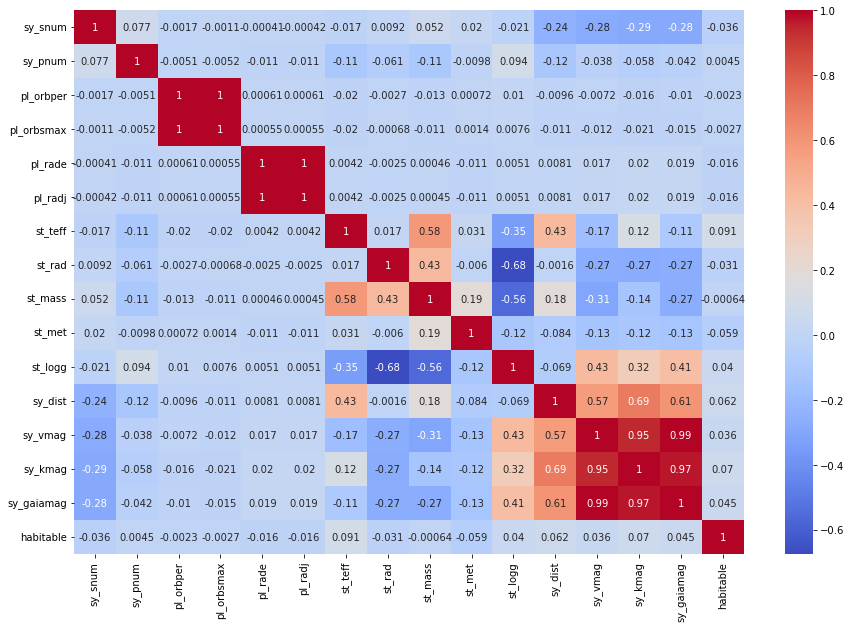

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True)
plt.show()

In [29]:
# Drop highly correlated and irrelevant features
df = df.drop(columns=[
    'pl_orbper',  # Perfectly correlated with pl_orbsmax
    'sy_vmag', 'sy_kmag'# Highly correlated > 0.95
])


In [30]:
df.describe()

,sy_snum,sy_pnum,pl_orbsmax,pl_rade,pl_radj,st_teff,st_rad,st_mass,st_met,st_logg,sy_dist,sy_gaiamag,habitable
count,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000,21985.000000
mean,1.072368,1.922311,0.546795,5.254211,0.468701,5504.612659,1.190536,0.964111,-0.023602,4.406857,669.919813,13.413659,0.103616
std,0.284058,1.216907,50.625288,79.635668,7.104637,712.300918,1.990008,0.315034,0.223978,0.283561,464.030620,2.177222,0.304769
min,1.000000,1.000000,0.005800,0.270000,0.024000,2703.000000,0.110000,0.090000,-2.500000,0.900000,1.826550,2.926270,0.000000
25%,1.000000,1.000000,0.070000,1.700000,0.152000,5179.810000,0.810000,0.840000,-0.150000,4.330000,316.618000,12.500400,0.000000
50%,1.000000,1.000000,0.100500,2.290000,0.204000,5650.000000,0.960000,0.960000,-0.010000,4.470000,611.041000,13.922200,0.000000
75%,1.000000,3.000000,0.124300,2.760000,0.246000,5975.640000,1.220000,1.080000,0.120000,4.550000,928.989000,14.991400,0.000000
max,4.000000,8.000000,7506.000000,4282.980000,382.103000,10170.000000,88.470000,23.560000,7.790000,5.400000,3460.510000,17.260400,1.000000


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(columns=['habitable'])
y = df['habitable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3941
           1       1.00      1.00      1.00       456

    accuracy                           1.00      4397
   macro avg       1.00      1.00      1.00      4397
weighted avg       1.00      1.00      1.00      4397



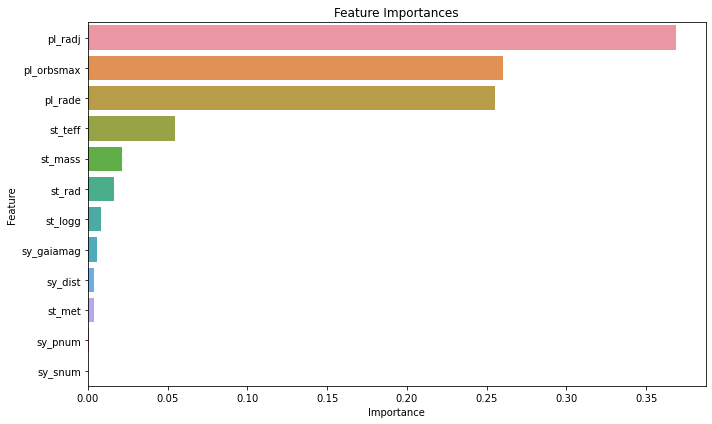

In [35]:
importances = clf.feature_importances_
features = X_train.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.utils import shuffle

# Only shuffle y_train, but keep it the same length as X_train
y_train_shuffled = shuffle(y_train, random_state=42)

# Fit your model with shuffled labels
clf.fit(X_train, y_train_shuffled)

# Predict using the actual test set
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3941
           1       0.08      0.07      0.08       456

    accuracy                           0.82      4397
   macro avg       0.49      0.49      0.49      4397
weighted avg       0.81      0.82      0.82      4397



In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [42]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train_sm, y_train_sm)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3941
           1       1.00      1.00      1.00       456

    accuracy                           1.00      4397
   macro avg       1.00      1.00      1.00      4397
weighted avg       1.00      1.00      1.00      4397



In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Split first!
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 2. Apply SMOTE to train only
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# 3. Train model
clf.fit(X_train_sm, y_train_sm)

# 4. Predict on **original** X_test
y_pred = clf.predict(X_test)


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3941
           1       1.00      1.00      1.00       456

    accuracy                           1.00      4397
   macro avg       1.00      1.00      1.00      4397
weighted avg       1.00      1.00      1.00      4397



In [48]:
from sklearn.utils import shuffle

y_train_shuffled = shuffle(y_train_sm, random_state=42)
clf.fit(X_train_sm, y_train_shuffled)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.50      0.64      3941
           1       0.11      0.52      0.18       456

    accuracy                           0.50      4397
   macro avg       0.50      0.51      0.41      4397
weighted avg       0.82      0.50      0.59      4397



In [51]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# STEP 1: Select your features and label
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# STEP 2: Train-test split FIRST (prevents data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# STEP 3: Scale features (fit only on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 4: SMOTE to balance classes (only on training set)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# STEP 5: Train your model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# STEP 6: Evaluate on untouched test set
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3941
           1       1.00      1.00      1.00       456

    accuracy                           1.00      4397
   macro avg       1.00      1.00      1.00      4397
weighted avg       1.00      1.00      1.00      4397



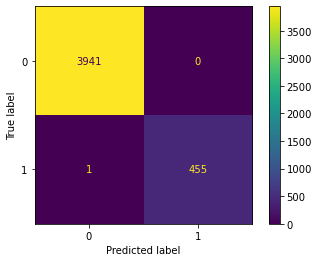

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

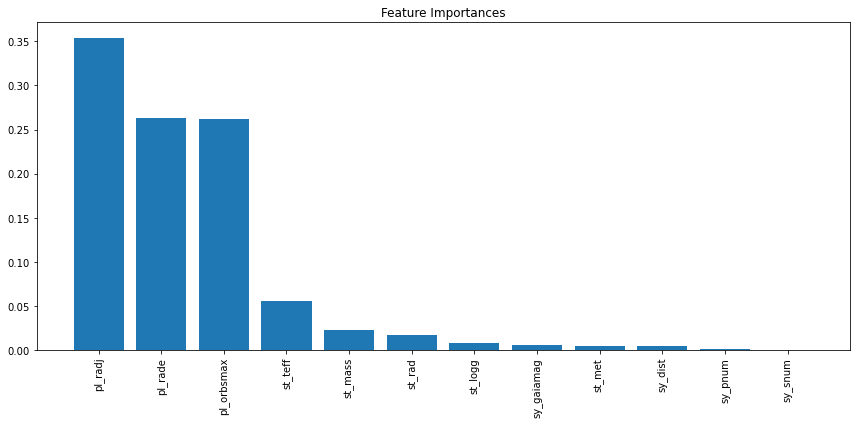

In [53]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='f1_macro')
print("Cross-validated F1 scores:", scores)
print("Mean F1:", scores.mean())


Cross-validated F1 scores: [0.99968289 1.         1.         1.         0.99968284]
Mean F1: 0.9998731467445774


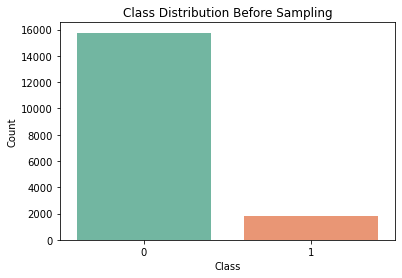

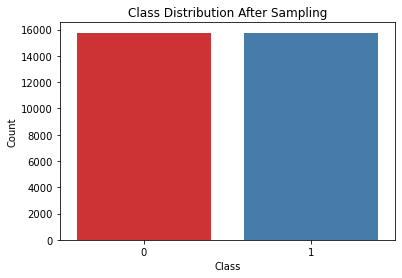

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette='Set2')
plt.title('Class Distribution Before Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=y_train_sm, palette='Set1')
plt.title('Class Distribution After Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


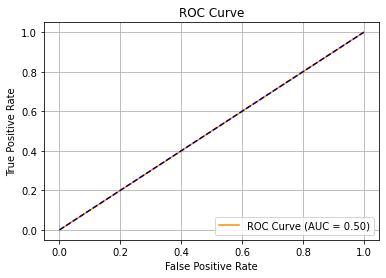

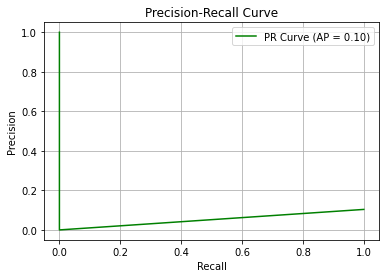

In [57]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

y_probs = model.predict_proba(X_test)[:,1]  

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})', color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [60]:
from xgboost import XGBClassifier
import numpy as np

# Calculate class weight ratio: (number of 0s) / (number of 1s)
neg, pos = np.bincount(y_train)
class_weight_ratio = neg / pos

# Now pass it to XGBClassifier
model = XGBClassifier(scale_pos_weight=class_weight_ratio, random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_xgb))
print("AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3941
           1       0.99      1.00      0.99       456

    accuracy                           1.00      4397
   macro avg       1.00      1.00      1.00      4397
weighted avg       1.00      1.00      1.00      4397

AUC Score: 0.9999348949638751


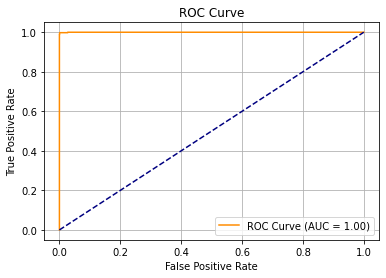

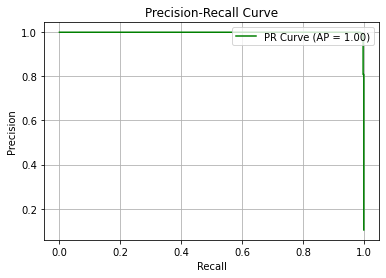

In [61]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

y_probs = model.predict_proba(X_test)[:,1]  

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})', color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [63]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.98      0.80      0.88      3941
           1       0.34      0.88      0.49       456

    accuracy                           0.81      4397
   macro avg       0.66      0.84      0.69      4397
weighted avg       0.92      0.81      0.84      4397



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
import pandas as pd

url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,pl_rade,pl_bmasse,pl_eqt,pl_orbper,st_teff,st_rad,st_mass,sy_dist+from+pscomppars&format=csv"
df = pd.read_csv(url)
df.to_csv("exoplanet_data.csv", index=False)
df.head()

,pl_name,pl_rade,pl_bmasse,pl_eqt,pl_orbper,st_teff,st_rad,st_mass,sy_dist
0,OGLE-2016-BLG-1227L b,13.90,250.000000,NaN,NaN,NaN,NaN,0.100,NaN
1,Kepler-24 e,2.78,8.150000,792.0,18.998355,5897.0,1.289,1.046,1156.8100
2,Kepler-1065 b,3.73,13.400000,1092.0,3.609309,5635.0,0.930,0.940,1122.4800
3,HD 132406 b,12.80,1887.900738,NaN,908.000000,5766.0,1.340,0.973,70.7832
4,TOI-1260 c,2.76,13.200000,651.0,7.493134,4227.0,0.672,0.679,73.5977


In [3]:
df.shape

(5869, 9)

In [4]:
(df.isnull().sum()/len(df))*100

pl_name       0.000000
pl_rade       0.374851
pl_bmasse     0.528199
pl_eqt       25.626171
pl_orbper     4.924178
st_teff       4.276708
st_rad        4.651559
st_mass       0.119271
sy_dist       0.425967
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5869 entries, 0 to 5868
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_name    5869 non-null   object 
 1   pl_rade    5847 non-null   float64
 2   pl_bmasse  5838 non-null   float64
 3   pl_eqt     4365 non-null   float64
 4   pl_orbper  5580 non-null   float64
 5   st_teff    5618 non-null   float64
 6   st_rad     5596 non-null   float64
 7   st_mass    5862 non-null   float64
 8   sy_dist    5844 non-null   float64
dtypes: float64(8), object(1)
memory usage: 412.8+ KB


In [6]:
df["pl_eqt"].fillna(df["pl_eqt"].median(), inplace=True)

In [7]:
(df.isnull().sum()/len(df))*100

pl_name      0.000000
pl_rade      0.374851
pl_bmasse    0.528199
pl_eqt       0.000000
pl_orbper    4.924178
st_teff      4.276708
st_rad       4.651559
st_mass      0.119271
sy_dist      0.425967
dtype: float64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(5486, 9)

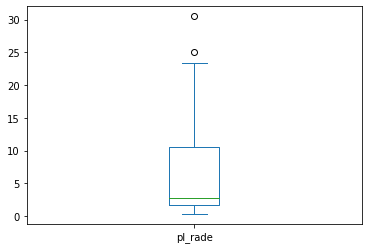

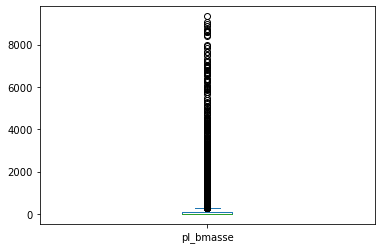

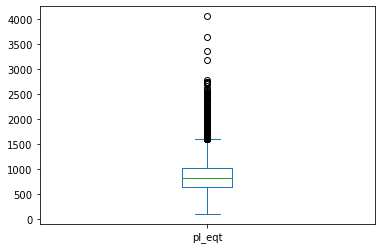

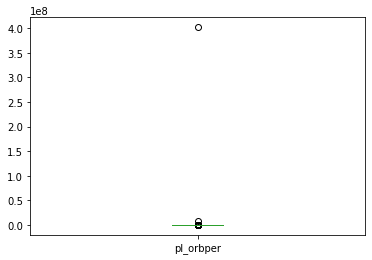

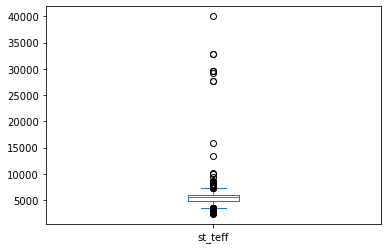

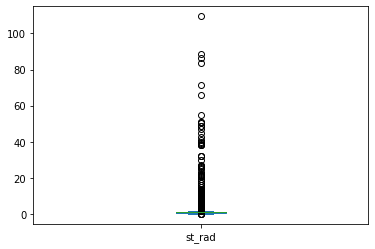

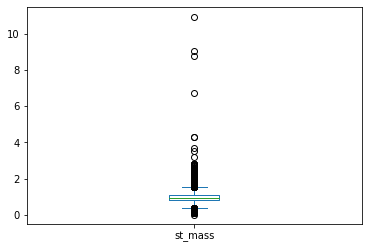

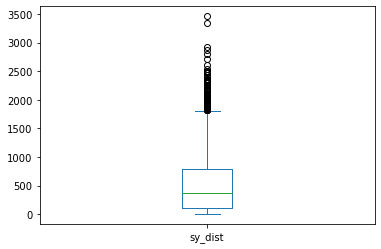

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns[1:]:
    df[i].plot(kind="box")
    plt.show()

<AxesSubplot:>

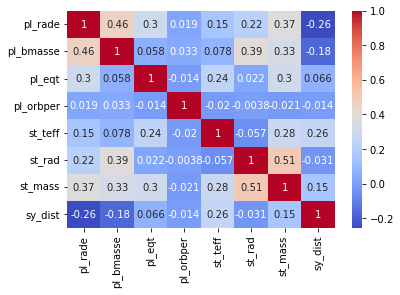

In [12]:
sns.heatmap(data=df.corr(), annot=True, cmap="coolwarm")